In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
punainen=pd.read_csv('http://taanila.fi/winequality-red.csv',sep=';')
valkoinen=pd.read_csv('http://taanila.fi/winequality-white.csv',sep=';')

punainen.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
valkoinen.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Ladattiin punaisen ja valkoisen viinin datasetit ja varmistettiin että data toimii. Seuraavaksi vielä varmistus että kaikilla viineillä on vastaus jokaiseen kohtaan...

In [7]:
punainen.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [8]:
valkoinen.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

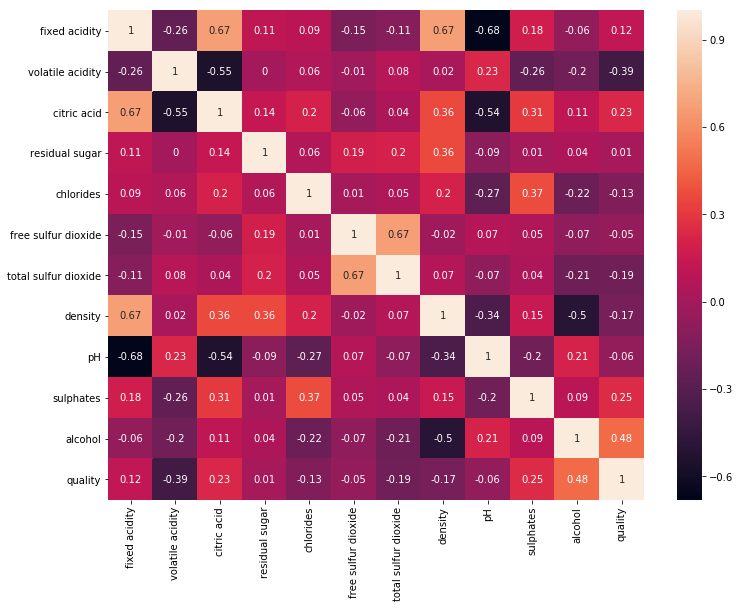

In [5]:
korrelaatiot_pun = punainen.corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(data=korrelaatiot_pun, annot=True)

Tällä heatmapilla saa hyvän yleiskuvan siitä, mitkä kaksi ominaisuutta korreloivat eniten, vaikka joukosta joutuukin erottelemaan joitakin "itsestäänselvyyksiä", kuten free sulfur dioxide suhteessa total sulfur dioxideen.

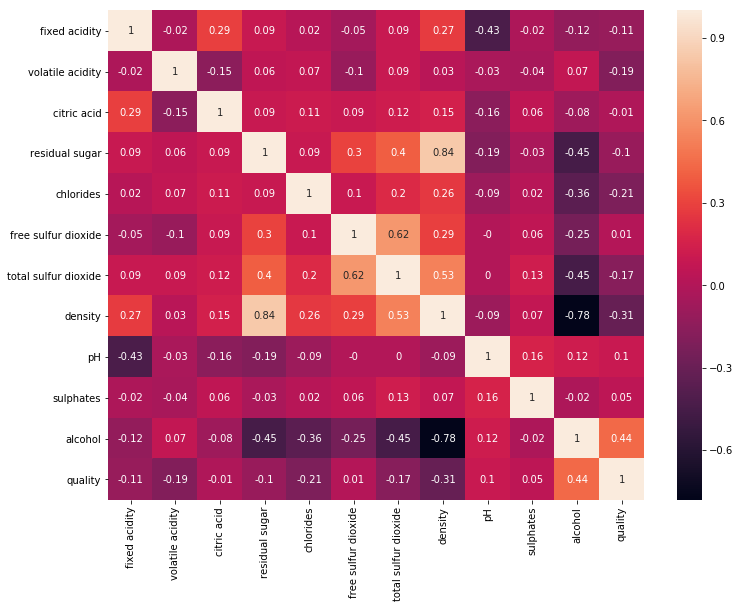

In [9]:
korrelaatiot_val = valkoinen.corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(data=korrelaatiot_val, annot=True)

Sama juttu valkoviineille. Suuri korrelaatio on densityn ja residual sugarin välillä.

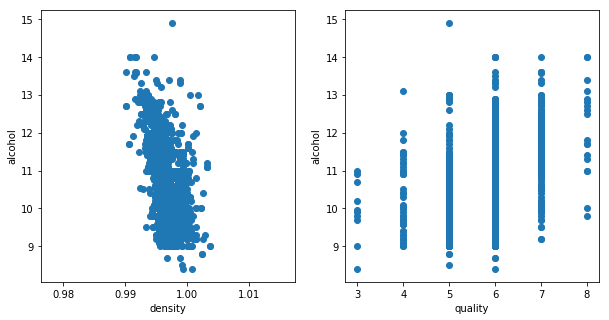

In [10]:
features = ["density", "quality"]
target = punainen["alcohol"]
plt.figure(figsize=(10,5))

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.scatter(punainen[feature], target)
    plt.xlabel(feature)
    plt.ylabel("alcohol")

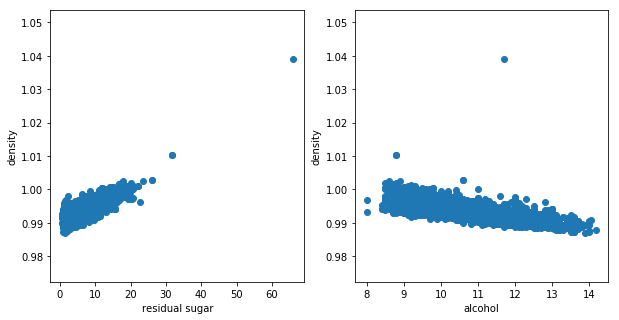

In [11]:
features = ["residual sugar", "alcohol"]
target = valkoinen["density"]
plt.figure(figsize=(10,5))

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.scatter(valkoinen[feature], target)
    plt.xlabel(feature)
    plt.ylabel("density")

Valkoviinin dataa pystytään tässä vaiheesa hyödyntämään ehkä hieman paremmin korkeampien korrelaatioiden vuoksi. Yksinkertaisuuden vuoksi pudotetaan siis punaiset pelistä pois.

Tutkitaan nyt siis tiheyden (density) suhdetta jäännössokeriin (residual sugariin) ja alkoholiin (alcohol).

In [13]:
from sklearn.model_selection import train_test_split
X = valkoinen[['residual sugar', 'alcohol']]
y = valkoinen['density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3918, 2)
(980, 2)
(3918,)
(980,)


In [14]:
from sklearn.linear_model import LinearRegression

malli_valk = LinearRegression()
malli_valk.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
malli_valk.intercept_

1.0044206746743332

In [16]:
malli_valk.coef_

array([ 0.00036523, -0.00121083])

In [23]:
from sklearn.metrics import mean_squared_error

y_train_predict = malli_valk.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = malli_valk.score(X_train,y_train)

print('Luodun mallin sopivuus opetusdataan')
print("")
print('Keskivirhe: {}'.format(rmse))
print('Selityskerroin: {}'.format(r2))
print("\n")

y_test_predict = malli_valk.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = malli_valk.score(X_test, y_test)

print("Luodun mallin sopivuus testidataan")
print("")
print("Keskivirhe: {}".format(rmse))
print("Selityskerroin: {}".format(r2))

Luodun mallin sopivuus opetusdataan

Keskivirhe: 0.0009315015654974627
Selityskerroin: 0.9042665905714727


Luodun mallin sopivuus testidataan

Keskivirhe: 0.000838525816341783
Selityskerroin: 0.9165723985741712


Keskivirhe on todella pieni ja selityskerroin hyvällä tasolla. Voidaan siis katsoa miltä testidatan havainnot näyttävät suhteessa ennusteisiin:

Text(27.125, 0.5, 'ennuste')

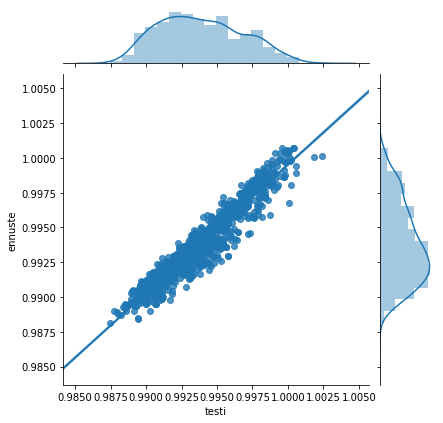

In [40]:
test = pd.DataFrame()
test["y_testi"] = y_test
test["y_testi_ennuste"] = y_test_predict

kuvio = sns.jointplot(data=test, x="y_testi",y="y_testi_ennuste",kind="reg")
kuvio.ax_joint.set_xlabel("testi")
kuvio.ax_joint.set_ylabel("ennuste")